# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

- Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

586


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
city = []
country = []
time_data = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

In [36]:
# Loop through the list of cities and perform a request for data on each
for i in range(len(cities)):
    response = requests.get(query_url + cities[i]).json()
    try:
        print(f"Processing record {i} of {len(cities)-1} | {cities[i]}")
        city.append(response['name'])
        country.append(response['sys']['country'])
        time_data.append(response['dt'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except KeyError:
        print("City not found. Skipping...")

Processing record 0 of 586 | pietarsaari
City not found. Skipping...
Processing record 1 of 586 | carnarvon
Processing record 2 of 586 | hilo
Processing record 3 of 586 | amderma
City not found. Skipping...
Processing record 4 of 586 | rikitea
Processing record 5 of 586 | bluff
Processing record 6 of 586 | ancud
Processing record 7 of 586 | strai
City not found. Skipping...
Processing record 8 of 586 | vaini
Processing record 9 of 586 | lagoa
Processing record 10 of 586 | new norfolk
Processing record 11 of 586 | kaitangata
Processing record 12 of 586 | cervo
Processing record 13 of 586 | aswan
Processing record 14 of 586 | svetlyy
City not found. Skipping...
Processing record 15 of 586 | klaksvik
Processing record 16 of 586 | roma
Processing record 17 of 586 | westport
Processing record 18 of 586 | sentyabrskiy
City not found. Skipping...
Processing record 19 of 586 | nakhon thai
Processing record 20 of 586 | taolanaro
City not found. Skipping...
Processing record 21 of 586 | victoria

Processing record 188 of 586 | laguna
Processing record 189 of 586 | srandakan
Processing record 190 of 586 | kupang
Processing record 191 of 586 | bonfim
Processing record 192 of 586 | fallon
Processing record 193 of 586 | akureyri
Processing record 194 of 586 | avera
Processing record 195 of 586 | umm lajj
Processing record 196 of 586 | narsaq
Processing record 197 of 586 | mecca
Processing record 198 of 586 | tamasane
Processing record 199 of 586 | ribeira grande
Processing record 200 of 586 | ulaangom
Processing record 201 of 586 | gushikawa
Processing record 202 of 586 | kibuye
Processing record 203 of 586 | eldikan
City not found. Skipping...
Processing record 204 of 586 | kirakira
Processing record 205 of 586 | kostino
Processing record 206 of 586 | storforshei
Processing record 207 of 586 | ahipara
Processing record 208 of 586 | makakilo city
Processing record 209 of 586 | okhotsk
Processing record 210 of 586 | itaituba
Processing record 211 of 586 | yulara
Processing record 21

Processing record 378 of 586 | palmer
Processing record 379 of 586 | mana
Processing record 380 of 586 | yinchuan
Processing record 381 of 586 | green river
Processing record 382 of 586 | jacqueville
Processing record 383 of 586 | waddan
Processing record 384 of 586 | matagami
Processing record 385 of 586 | kralendijk
Processing record 386 of 586 | toguchin
Processing record 387 of 586 | kavaratti
Processing record 388 of 586 | tahta
City not found. Skipping...
Processing record 389 of 586 | tromso
Processing record 390 of 586 | galle
Processing record 391 of 586 | murgab
Processing record 392 of 586 | muros
Processing record 393 of 586 | thunder bay
Processing record 394 of 586 | daultala
Processing record 395 of 586 | vallenar
Processing record 396 of 586 | finschhafen
Processing record 397 of 586 | camaguey
Processing record 398 of 586 | lima
Processing record 399 of 586 | trinidad
Processing record 400 of 586 | kendari
Processing record 401 of 586 | noumea
Processing record 402 of 

Processing record 571 of 586 | guiyang
Processing record 572 of 586 | borzya
Processing record 573 of 586 | orlovskiy
Processing record 574 of 586 | fortuna foothills
Processing record 575 of 586 | madang
Processing record 576 of 586 | binzhou
Processing record 577 of 586 | los llanos de aridane
Processing record 578 of 586 | freeport
Processing record 579 of 586 | auki
Processing record 580 of 586 | yomou
Processing record 581 of 586 | katherine
Processing record 582 of 586 | morgan city
Processing record 583 of 586 | bali
Processing record 584 of 586 | san rafael
Processing record 585 of 586 | nakamura


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
# Export the city data into a .csv
city_series = pd.Series(city)
city_series.to_csv(output_data_file, index=False)

In [40]:
# create a data frame from city, country, latitude, longitude, time_data, temperature, humidity, cloudiness, wind_speed
weather_dict = {
    "City": city,
    "Country": country,
    "Lat": latitude,
    "Lng": longitude,
    "Date": time_data,
    "Max Temp": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          527
Cloudiness    527
Country       527
Date          527
Humidity      527
Lat           527
Lng           527
Max Temp      527
Wind Speed    527
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [41]:
# Display the DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carnarvon,0,ZA,1547806594,22,-30.97,22.13,76.56,11.03
1,Hilo,1,US,1547801580,81,19.71,-155.08,64.94,5.82
2,Rikitea,80,PF,1547806264,98,-23.12,-134.97,80.25,14.16
3,Bluff,92,AU,1547806595,54,-23.58,149.07,82.68,8.57
4,Ancud,0,CL,1547802000,76,-41.87,-73.83,50.00,6.93


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


In [47]:
# Export the weather_data DataFrame into a .csv
weather_data.to_csv("output_data/weather_data.csv", index=False, header=True)

In [79]:
# Convert Date into MM/DD/YY format
DM = lambda x: str(x) if x > 9 else f"0{x}"
YY = lambda year: str(year)[-2:]
t_mean = time.gmtime(weather_data.Date.mean())
print(t_mean)
date_plot = f"{DM(t_mean[1])}/{DM(t_mean[2])}/{YY(t_mean[0])}"
t_min = time.gmtime(weather_data.Date.min())
print(t_min)
print(f"min: {DM(t_min[1])}/{DM(t_min[2])}/{YY(t_min[0])}")
t_max = time.gmtime(weather_data.Date.max())
print(t_max)
print(f"max: {DM(t_max[1])}/{DM(t_max[2])}/{YY(t_max[0])}")


time.struct_time(tm_year=2019, tm_mon=1, tm_mday=18, tm_hour=9, tm_min=56, tm_sec=23, tm_wday=4, tm_yday=18, tm_isdst=0)
time.struct_time(tm_year=2019, tm_mon=1, tm_mday=18, tm_hour=8, tm_min=50, tm_sec=0, tm_wday=4, tm_yday=18, tm_isdst=0)
min: 01/18/19
time.struct_time(tm_year=2019, tm_mon=1, tm_mday=18, tm_hour=10, tm_min=19, tm_sec=8, tm_wday=4, tm_yday=18, tm_isdst=0)
max: 01/18/19


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

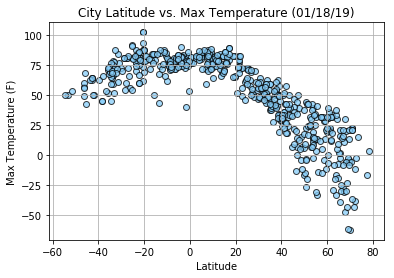

In [80]:
# Build figure
temperature_plot = plt.scatter(weather_data['Lat'], weather_data['Max Temp'], facecolors='lightskyblue',
                               linewidths=1, edgecolors='black', alpha=0.75)
plt.title(f"City Latitude vs. Max Temperature ({date_plot})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

# Save Figure
plt.savefig("output_data/latitude_temperature_plot.png")

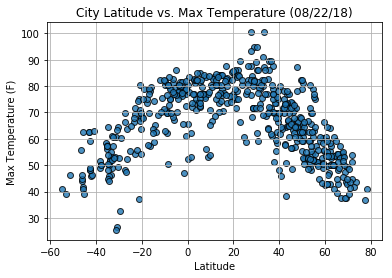

#### Latitude vs. Humidity Plot

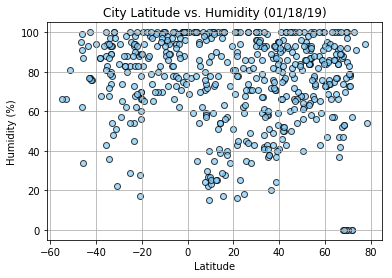

In [81]:
# Build figure
humidity_plot = plt.scatter(weather_data['Lat'], weather_data['Humidity'], facecolors='lightskyblue',
                               linewidths=1, edgecolors='black', alpha=0.75)
plt.title(f"City Latitude vs. Humidity ({date_plot})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

# Save Figure
plt.savefig("output_data/latitude_humidity_plot.png")

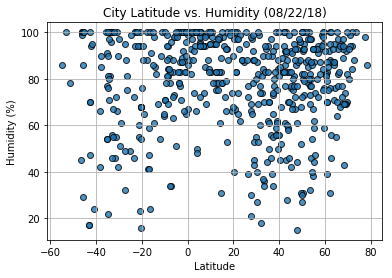

#### Latitude vs. Cloudiness Plot

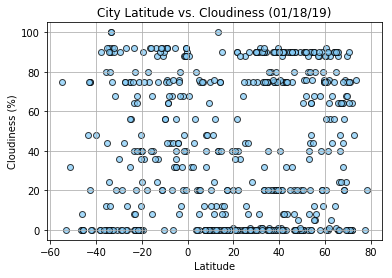

In [82]:
# Build figure
cloudiness_plot = plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], facecolors='lightskyblue',
                               linewidths=1, edgecolors='black', alpha=0.75)
plt.title(f"City Latitude vs. Cloudiness ({date_plot})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

# Save Figure
plt.savefig("output_data/latitude_cloudiness_plot.png")

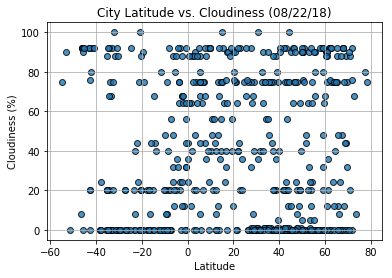

#### Latitude vs. Wind Speed Plot

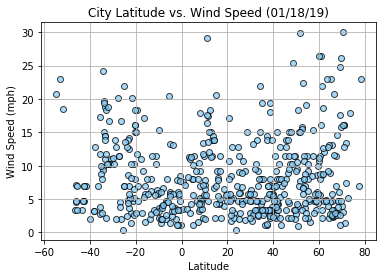

In [83]:
wind_speed_plot = plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], facecolors='lightskyblue',
                               linewidths=1, edgecolors='black', alpha=0.75)
plt.title(f"City Latitude vs. Wind Speed ({date_plot})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

# Save Figure
plt.savefig("output_data/latitude_wind_speed_plot.png")

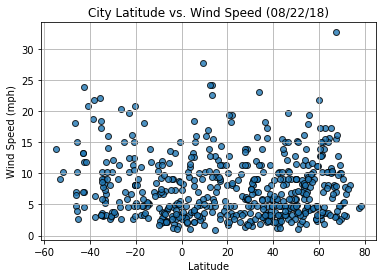